In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# importing data

In [2]:
dataset = pd.read_csv("../input/calcofi/bottle.csv")
dataset.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.shape

(864863, 74)

In [4]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [5]:
dataset=dataset[["Salnty","T_degC"]]
dataset.head()

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [6]:
dataset.Salnty.isnull().value_counts()

False    817509
True      47354
Name: Salnty, dtype: int64

In [7]:
dataset.T_degC.isnull().value_counts()

False    853900
True      10963
Name: T_degC, dtype: int64

In [8]:
dataset=dataset.dropna(axis=0)

In [9]:
dataset.reset_index(drop=True,inplace=True)
dataset.shape

(814247, 2)

# visualization

Text(0, 0.5, 'Salinity')

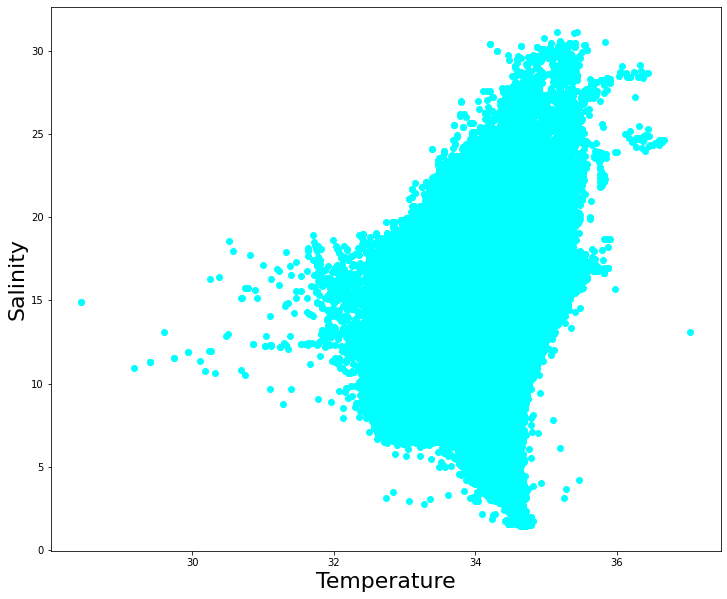

In [10]:
plt.figure(figsize=(12,10))
plt.scatter(dataset.Salnty,dataset.T_degC, color='aqua')
plt.xlabel("Temperature",fontsize=22)
plt.ylabel("Salinity",fontsize=22)

In [11]:
x_label=np.array(dataset['Salnty']).reshape(814247,1)
y_label=np.array(dataset['T_degC']).reshape(814247,1)

# train , test sets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size = 0.2, random_state = 100)

# Building and fitting the Regression Model

In [13]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)
print('Coefficients: ', regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

Coefficients:  [[-4.6221255]]
Intercept:  [167.27613738]


In [14]:
accuracy = regression_model.score(x_test, y_test)
accuracy

0.2541796569552889

Text(0.5, 1.0, 'Linear Regression')

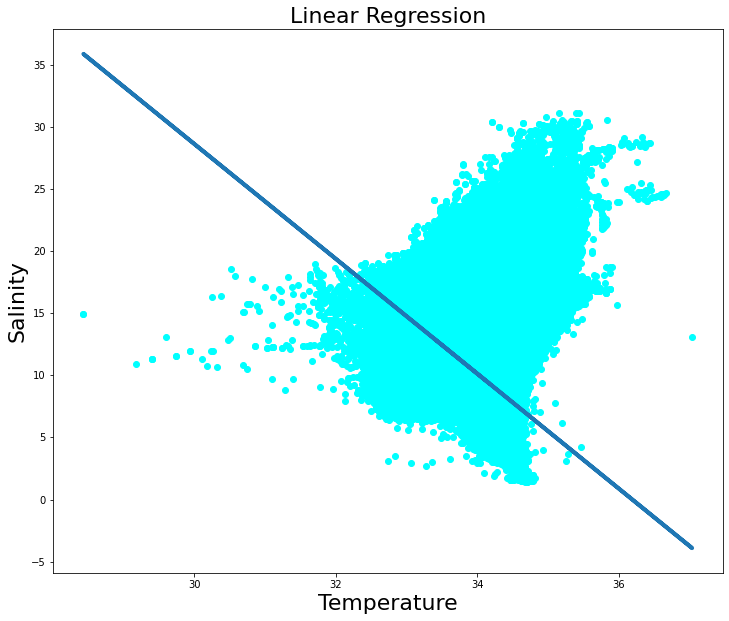

In [15]:
plt.figure(figsize=(12,10))
plt.scatter(x_label, y_label,  color='aqua')
plt.plot(x_train, regression_model.predict(x_train),linewidth="4")
plt.xlabel("Temperature",fontsize=22)
plt.ylabel("Salinity",fontsize=22)
plt.title("Linear Regression",fontsize=22)

very low accuracy 
let's try other continious models 

In [16]:
x_train.shape

(651397, 1)

In [17]:
y_train.shape

(651397, 1)

In [19]:
# from sklearn.datasets import make_regression
# #isotonicRegression
# from sklearn.isotonic import IsotonicRegression
# iso_reg = IsotonicRegression().fit(x_train,y_train)

In [26]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [27]:
accuracy2 = reg.score(x_test, y_test)
accuracy2

0.253138818595821

Text(0.5, 1.0, ' SGDRegressor')

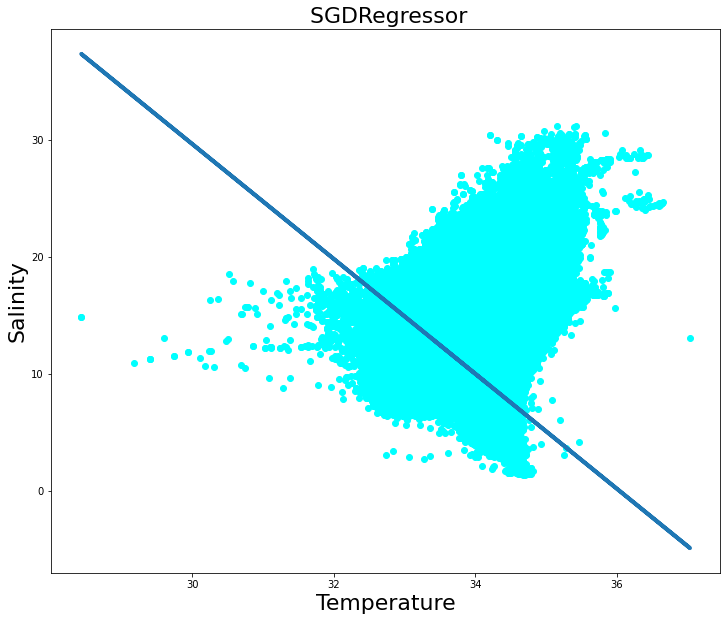

In [28]:
plt.figure(figsize=(12,10))
plt.scatter(x_label, y_label,  color='aqua')
plt.plot(x_train, reg.predict(x_train),linewidth="4")
plt.xlabel("Temperature",fontsize=22)
plt.ylabel("Salinity",fontsize=22)
plt.title(" SGDRegressor",fontsize=22)